In [15]:
#!pip install stravalib
#!pip install stravaio

- https://github.com/sladkovm/stravaio/blob/master/stravaio.py
- https://pypi.org/project/stravaio/

In [67]:
client = Client(access_token=token['access_token'])

In [74]:
activities = [activity for activity in client.get_activities(after="2020-12-20")]


In [81]:
activities[0]

<Activity id=4497265308 name='Little chillier today ' resource_state=2>

In [ ]:
unithelper.

In [84]:
swims = pd.DataFrame([{'name':activity.name,
                       'id': activity.id, 
                       'temperature': unithelper.c2f(activity.average_temp),
                       'stroke_count': 2 * activity.average_cadence if activity.average_cadence is not None else None,
                       'average_speed':float(unithelper.meters_per_second(activity.average_speed)),
                       'elapsed_time':activity.elapsed_time, 
                       'start_date': activity.start_date_local,
                       'distance':float(activity.distance)} for activity in activities
                                   if activity.type=='Swim' ])

In [85]:
swims

,name,id,temperature,stroke_count,average_speed,elapsed_time,start_date,distance
0,Little chillier today,4497265308,51.8,67.8,0.710,00:54:30,2020-12-20 08:30:22,2322.4
1,Let the polar bear begin!,4501614222,51.8,65.6,0.739,00:35:05,2020-12-21 12:43:16,1555.0
2,Last one for the road!,4504667585,51.8,67.2,0.652,00:46:02,2020-12-22 07:02:34,1801.6


In [65]:
import pandas as pd

swims = pd.DataFrame([{'name':activity.name,
                       'id': activity.id, 
                       #'stroke_count': 2 * activity.average_cadence if activity.average_cadence is not None else None,
                       'average_speed':float(unithelper.meters_per_second(activity.average_speed)),
                       'elapsed_time':activity.elapsed_time, 
                       'start_date': activity.start_date_local,
                       'distance':float(activity.distance)} for activity in activities 
                      if activity.type=='Swim' and pd.to_datetime(activity.start_date_local) <= pd.to_datetime("2020-12-21",  utc=True)
                     ])
swims

,name,id,average_speed,elapsed_time,start_date,distance
0,Baby it’s choppy outside!,4492989173,0.709,14521,2020-12-19 08:52:39+00:00,10289.2
1,Little chillier today,4497265308,0.710,3270,2020-12-20 08:30:22+00:00,2322.4


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
from os.path import expanduser

sys.path.append("{0}/repos/polso/strava/".format(expanduser("~")))

import pandas as pd
import datetime

from IPython.display import Markdown

from strava_dash import StravaScraper


`2nd to 8th September slot 1 Spring tide`

https://tides.mobilegeographics.com/locations/2089.html?y=2020&m=9&d=1


In [2]:
ec_distance = 33,796.2 / StravaScraper.M_TO_YD
ec_distance

(33, 728.047475791187)

In [3]:
%%capture
training = StravaScraper()
training.get_swims(after='2019-11-01', before='2020-09-10')
training.get_xtraining(after='2019-11-01', before='2020-09-10')

2020-12-23 10:22:53.594 | INFO     | stravaio:strava_oauth2:343 - serving at port 8000
2020-12-23 10:22:55.752 | DEBUG    | stravaio:run_server_and_wait_for_token:397 - code: 89c58c3b3efef6aa1f68a378f1f4e8187e64edf5
2020-12-23 10:22:56.253 | DEBUG    | stravaio:run_server_and_wait_for_token:406 - Authorized athlete: 8b95c9882b627e2c009cb21c0251df57743e6c4d


## The Plan

| Month    | Days |  Yds/Week  |    X-Train Sesh   |  Running miles  |
| :------- |:---: | :--------: | :---------------: | :-------------: |
| November | 30   |   20,000   | Yoga+Strength+Run         |    |
| December | 31   |   25,000   |    4    |    |
| January  | 31   |   28,000   |    5    |    |
| February | 28   |   30,000   |    5    |    |
| March    | 31   |   30,000   |    5    |    |
| April    | 31   |   35,000   |    3-4  |    |
| May      | 31   |   30,000   |    3-4    |    |
| June     | 30   |   35,000   |    5    |    |
| July     | 31   |   35,000   |    3-4    |    |
| August   | 31   |   20.000   |   Yoga    |    |

## The Execution

In [4]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 333351 


In [5]:
training.monthly_yardage

,distance,weekly distance
start_date,,
January,43407.0,10851.750
February,86235.9,21558.975
March,23892.9,5973.225
May,11714.9,2928.725
June,24407.5,6101.875
July,58500.2,14625.050
August,29677.2,7419.300
September,7285.1,1821.275
November,37313.1,9328.275


In [8]:
avg_x_train = training.x_training.groupby(['ds_week_ending', 
                                           'month']).count().reset_index().groupby(
    'month').activity.mean()
avg_x_train.index = avg_x_train.index.map(lambda x: datetime.date(1900, x, 1).strftime('%B'))

training.monthly_yardage.merge(
    pd.DataFrame({'avg_x_train': avg_x_train}), right_index=True, left_index=True).loc[['December', 'January', 
                                                                                        'February', 'March', 'April', 
                                                                                        'May', 'June', 'July',
                                                                                        'August']]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


,distance,weekly distance,avg_x_train
December,10917.4,2729.350,2.00
January,43407.0,10851.750,2.25
February,86235.9,21558.975,2.50
March,23892.9,5973.225,4.40
April,NaN,NaN,NaN
May,11714.9,2928.725,1.80
June,24407.5,6101.875,2.50
July,58500.2,14625.050,1.00
August,29677.2,7419.300,1.00


## Yards

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

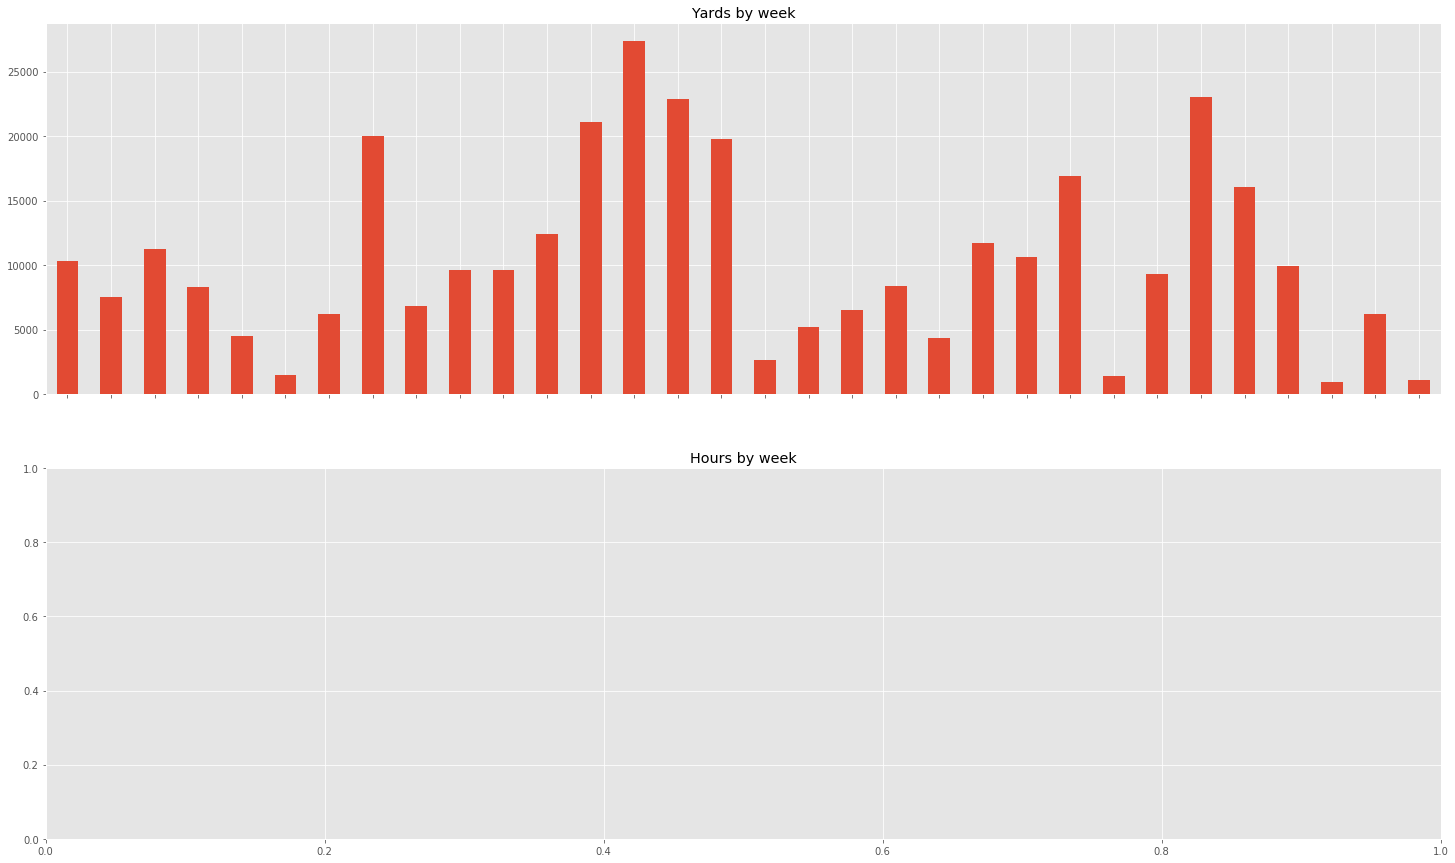

In [9]:
tmp = training.plot_summary(yardage_goal=ec_distance)

## In N Out

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:253: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


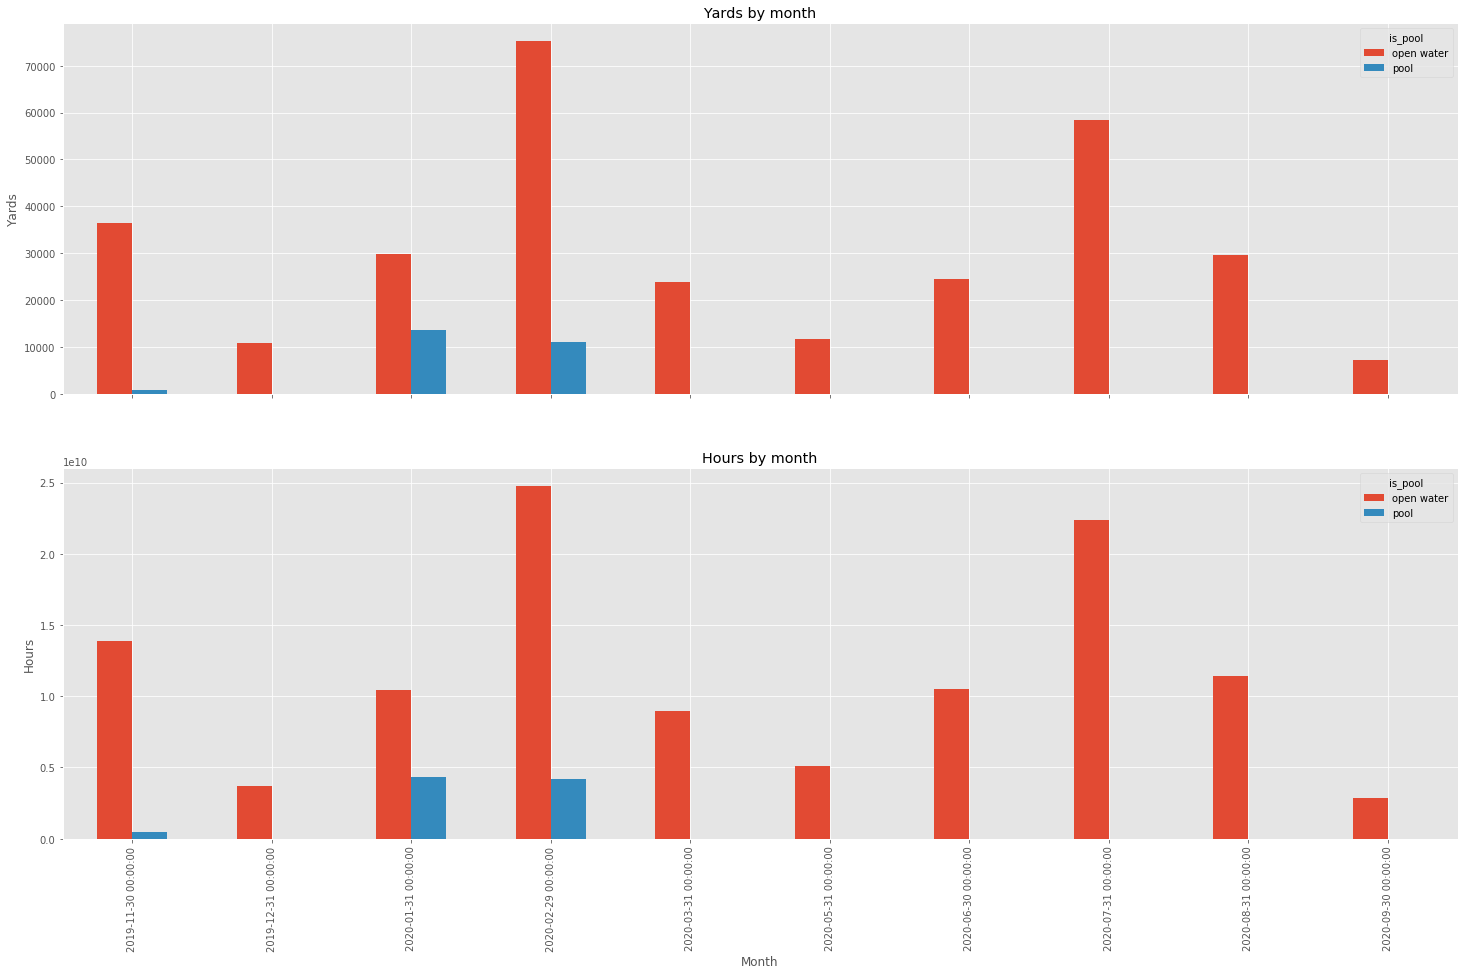

In [10]:
tmp = training.plot_summary(in_n_out=True, by='month')

## Crosstraining

In [11]:
training.x_training.activity.unique()

array(['Run', 'Workout', 'WeightTraining', 'Rowing', 'Yoga', 'VirtualRun'],
      dtype=object)

In [12]:
swims = training.swims
swims['activity'] = swims['is_pool'].apply(lambda x: {'open water': 'OpenWater', 'pool':'Pool'}[x])
full_training = pd.concat([swims[training.x_training.columns], training.x_training])
full_training.groupby('activity')['elapsed_time'].sum().apply(lambda x: x / 3600)

activity
OpenWater         0 days 00:01:53.889166
Pool                     0 days 00:00:09
Rowing                          0.166667
Run                              24.5367
VirtualRun                      0.833333
WeightTraining                     16.25
Workout                               12
Yoga                                   1
Name: elapsed_time, dtype: object

In [13]:
full_training.groupby(['ds_month_ending', 'activity'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack()

activity,OpenWater,Pool,Rowing,Run,VirtualRun,WeightTraining,Workout,Yoga
ds_month_ending,,,,,,,,
2019-11-30,00:00:13.847222,00:00:00.500000,NaN,4.68139,NaN,4,NaN,NaN
2019-12-31,00:00:03.693888,NaT,NaN,1.52278,NaN,1,NaN,NaN
2020-01-31,00:00:10.409444,00:00:04.333333,NaN,0.804722,0.833333,3.75,NaN,NaN
2020-02-29,00:00:24.779722,00:00:04.166666,0.166667,0.371389,NaN,1,NaN,1
2020-03-31,00:00:08.941944,NaT,NaN,7.07361,NaN,4.5,0.333333,NaN
2020-04-30,NaT,NaT,NaN,5.43722,NaN,2,5,NaN
2020-05-31,00:00:05.099722,NaT,NaN,1.17056,NaN,NaN,5.66667,NaN
2020-06-30,00:00:10.473055,NaT,NaN,1.64694,NaN,NaN,1,NaN
2020-07-31,00:00:22.359166,NaT,NaN,0.854167,NaN,NaN,NaN,NaN


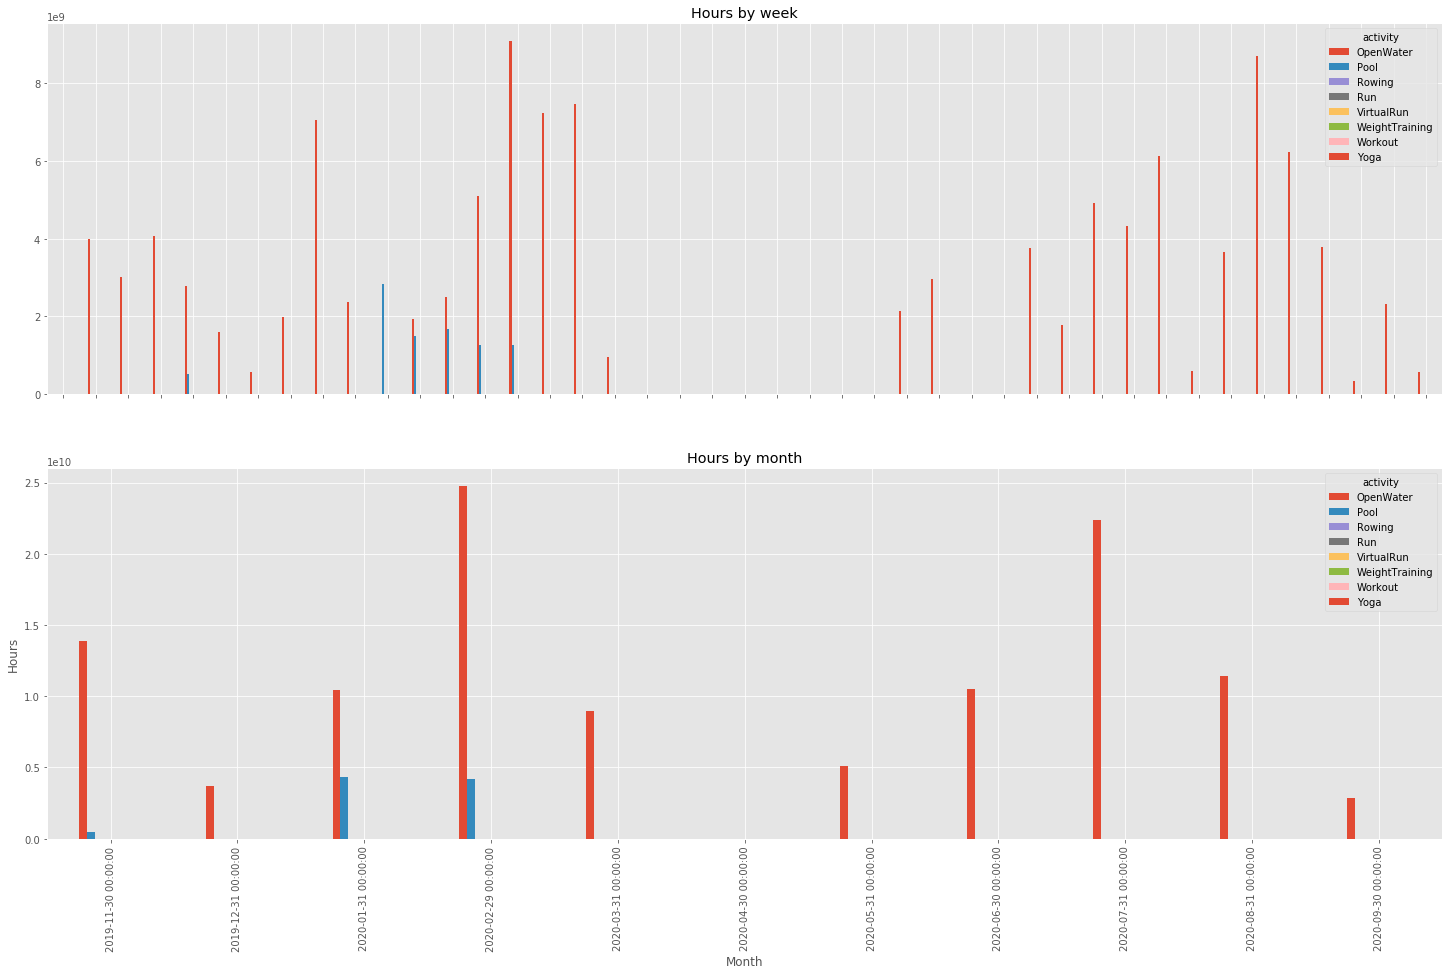

In [14]:
tmp=training.plot_x_training()

### Year on Year

In [21]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-11-01', before='2018-09-30')

In [22]:
Markdown("""
##### Year on Year: 2018/2019 = {0:%} 2017/2018
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2018/2019 = 69.332457% 2017/2018


In [23]:
training.in_out / training_old.in_out

,total,percentage
is_pool,,
open water,0.894654,1.290384
pool,0.234299,0.337935


In [17]:
train_dummy = StravaScraper()
total_yards = []
in_out = []
for after, before in [('2017-01-01', '2017-09-05'),
                      ('2017-11-01', '2018-09-30'), 
                      ('2018-11-01', '2019-09-01')]:
    train_dummy.get_swims(after=after, before=before)
    total_yards.append(train_dummy.total_yards)
    in_out.append(train_dummy.in_out.total)
training_years = pd.merge(pd.DataFrame(total_yards, index=['2017', '2018', '2019']),
                          pd.DataFrame(in_out, index=['2017', '2018', '2019']), 
                          right_index=True, left_index=True)
training_years.columns = ['total_yards', 'open_water', 'pool']

2020-12-23 10:33:40.805 | INFO     | stravaio:strava_oauth2:343 - serving at port 8000
2020-12-23 10:33:44.614 | DEBUG    | stravaio:run_server_and_wait_for_token:397 - code: 319612f51c23d144136367ddbb1282e8b2a276ba
2020-12-23 10:33:45.087 | DEBUG    | stravaio:run_server_and_wait_for_token:406 - Authorized athlete: 8b95c9882b627e2c009cb21c0251df57743e6c4d


KeyboardInterrupt: 

In [16]:
training_years

NameError: name 'training_years' is not defined

# Appendix Full Training

In [15]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())

,ds_week_ending,name,distance,hours,activity
start_date,,,,,
2019-11-02 11:19:03-07:00,2019-11-03,Running in Sin City,5290.010292,0.543611,Run
2019-11-04 06:10:00-08:00,2019-11-10,EC 2020: so it begins,2671.400000,0 days 00:00:00.923055,open water
2019-11-05 17:30:08-08:00,2019-11-10,Quadruple 7!,0.000000,1,WeightTraining
2019-11-06 06:16:05-08:00,2019-11-10,Swimming into dogs,2856.400000,0 days 00:00:00.985833,open water
2019-11-07 18:00:59-08:00,2019-11-10,Run with huckleberry!,14378.674919,1.3,Run
2019-11-07 20:46:13-08:00,2019-11-10,Run home,1499.011227,0.135556,Run
2019-11-09 07:47:09-08:00,2019-11-10,That seal needs an intervention,4751.700000,0 days 00:00:02.080833,open water
2019-11-11 06:16:32-08:00,2019-11-17,Best way to start the week!,2495.000000,0 days 00:00:00.975000,open water
2019-11-12 17:10:01-08:00,2019-11-17,Still a bit achey,3103.555819,0.281389,Run
